In [14]:
import numpy as np
import importlib.util
import glob
import os
import importlib
import read_library
importlib.reload(read_library);


In [15]:

current_directory = os.getcwd()
csv_files = glob.glob(os.path.join(current_directory, 'data','SpectralAlbedoData','*.csv'))
sli = read_library.read_library(csv_files)
print("Done!") 


Done!


In [3]:
csv_files[123]

'C:\\Users\\myang\\Documents\\GitHub\\IceSpectralLibraryAnalysis\\data\\SpectralAlbedoData\\spectralalbedo_mosaic_20200919_SNOWTARGET_processedv0.csv'

In [96]:
sli.names[10:30]

['Albedo10-S',
 'Albedo11-S',
 'Albedo12-S',
 'Albedo13-S',
 'Albedo0-S',
 'Albedo1-S',
 'Albedo2-S',
 'Albedo3-S(P)',
 'Albedo4-S',
 'Albedo5-S',
 'Albedo6-S(P)',
 'Albedo7-S',
 'Albedo8-S',
 'Albedo9-S',
 'Albedo10-S',
 'Albedo11-S',
 'Albedo12-S',
 'Albedo13-S',
 'Albedo14-S',
 'Albedo15-S']

In [35]:
csv_file_path = "C:\\Users\\myang\\Documents\\GitHub\\IceSpectralLibraryAnalysis\\data\\SpectralAlbedoData\\spectralalbedo_mosaic_20200626_RBB_processedv0.csv"

In [19]:
import csv

def get_surface_type(csv_file_path):
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for index, row in enumerate(reader):
            if 'Surface type' in row:
                return index

In [23]:
get_surface_type(csv_file_path)

9

In [27]:
import csv

def get_surface_thickness(csv_file_path):
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for index, row in enumerate(reader):
            if 'Surface thickness (cm)' in row:
                return index

In [28]:
get_surface_thickness(csv_file_path)

10

In [68]:
surface_type_idx = get_surface_type(csv_file_path)
surface_type_df = pd.read_csv(csv_file_path, skiprows=lambda x: x != surface_type_idx, header=None)
surface_type_df

,0,1,2,3,4,5,6,7,8
0,Surface type,S,P,P,P,P,S,P,S


In [71]:
surface_type_df[1]

0     S
Name: 1, dtype: object

In [74]:
col_name='name'
name=col_name+' -'+surface_type_df[2]
name

0    name - P
Name: 2, dtype: object

In [83]:
for i, (col_name) in enumerate(df.columns[1:3]):
    print(col_name+' -'+surface_type_df[i+1])

0    Albedo0 - S
Name: 1, dtype: object
0    Albedo1 - P
Name: 2, dtype: object


In [36]:
import pandas as pd

idx = read_library.find_row_with_wavelengths(csv_file_path)
df = pd.read_csv(csv_file_path, header=idx)


In [37]:
for i, (col_name) in enumerate(df.columns[1:3]):
    print(i+1, df.columns[1])

1 Albedo0
2 Albedo0


In [68]:
surface_type_idx = read_library.get_surface_type(csv_file_path)
surface_type_df = pd.read_csv(csv_file_path, skiprows=lambda x: x != surface_type_idx, header=None)

for i, (col_name) in enumerate(df.columns[1:6]):
    #print(col_name)
    if (surface_type_df.loc[0,i+1] != 'NaN'):
        name = col_name + ' -' + surface_type_df.loc[0,i+1]
    else:
        name = col_name
    print(name, '------------' ,surface_type_df.loc[0,i+1])


Albedo0 - S ------------  S
Albedo1 - S ------------  S
Albedo2 - P ------------  P
Albedo3 - S ------------  S
Albedo4 - S ------------  S


In [33]:
print(surface_type_df.loc[0,1])

 S


In [54]:
surface_type_idx = read_library.get_surface_type(csv_file_path)
surface_type_df = pd.read_csv(csv_file_path, skiprows=lambda x: x != surface_type_idx, header=None)

for i, (col_name) in enumerate(df.columns[1:15]):
    name = col_name + ' -' + surface_type_df.loc[0,i+1]

    print(name)


Albedo0 - S
Albedo1 - S
Albedo2 - P
Albedo3 - S
Albedo4 - S
Albedo5 - S
Albedo6 - S
Albedo7 - P
Albedo8 - S
Albedo9 - S
Albedo10 - S
Albedo11 - S
Albedo12 - S
Albedo13 - S


In [16]:
sli.resample_planet8b()
print('Done!')

Done!


In [17]:
import numpy as np

# Create a boolean mask to identify rows without NaN values
mask = ~np.isnan(sli.spectra).any(axis=1)
#mask = ~np.isnan(sli).any(axis=1)

# Use the mask to filter out rows with NaN values
sli_data = sli.spectra[mask, :]

In [49]:
sli_data[2:6]

array([[0.491, 0.493, 0.496, ..., 0.064, 0.065, 0.065],
       [0.464, 0.466, 0.468, ..., 0.072, 0.072, 0.073],
       [0.49 , 0.491, 0.493, ..., 0.075, 0.075, 0.075],
       [0.511, 0.512, 0.513, ..., 0.065, 0.065, 0.066]])

In [19]:
sli.spectra[1,1]

0.805

2388969
(2712, 2151)
0
(720, 1404)
1404


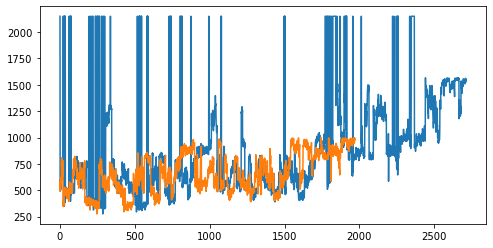

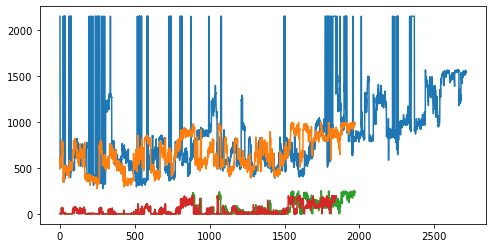

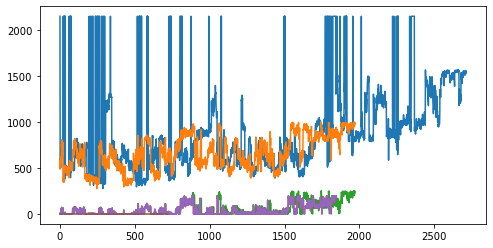

In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

nan_mask = np.isnan(sli.spectra) 
nRows, nCols = nan_mask.shape
row_idx = np.arange(nRows)
col_idx = np.arange(nCols)
print(np.sum(nan_mask))
print(nan_mask.shape)

# reducing number of spectra
col_sum1 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum1<1000,:]
row_idx = row_idx[col_sum1<1000]
col_sum2 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)

# reducing number of bands
row_sum1 = np.sum(nan_mask, axis=0)
nan_mask = nan_mask[:,row_sum1<750]
col_idx = col_idx[row_sum1<750]
row_sum2 = np.sum(nan_mask, axis=0)
#plt.figure()
#plt.plot(wl,row_sum1)
wl2 = sli.wl[row_sum1<750]
#plt.plot(wl2,row_sum2)
#plt.xlabel("Wavelength (nm)")

# reducing number of spectra
col_sum3 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum3<200,:]
row_idx = row_idx[col_sum3<200]
col_sum4 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)
plt.plot(col_sum3)
plt.plot(col_sum4)

# reducing number of bands
row_sum3 = np.sum(nan_mask, axis=0)
nan_mask = nan_mask[:,row_sum3<750]
col_idx = col_idx[row_sum3<750]
row_sum4 = np.sum(nan_mask, axis=0)
#plt.figure()
#plt.plot(wl,row_sum1)
#plt.plot(wl2,row_sum2)
#plt.plot(wl2,row_sum3)
wl3 = wl2[row_sum3<750]
#plt.plot(wl3,row_sum4)
#plt.title('row_sum4')
#plt.xlabel("Wavelength (nm)")

# reducing number of spectra
col_sum5 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum5<1,:]
row_idx = row_idx[col_sum5<1]
col_sum6 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)
plt.plot(col_sum3)
plt.plot(col_sum4)
plt.plot(col_sum5)
plt.plot(col_sum6)

#plt.figure()
#plt.plot(wl,sli.spectra[100,:]);
#plt.xlabel("Wavelength (nm)")

print(np.sum(nan_mask))
sli_names = np.asarray(sli.names)[row_idx]
sli_data = sli.spectra[row_idx,:]
sli_data = sli_data[:,col_idx]
#plt.figure()
#plt.plot(wl3,data.T);
print(sli_data.shape)
#plt.figure()
#plt.plot(wl3,data[0,:]);
print(len(wl3))

In [34]:
n=np.asarray(sli.names)[row_idx]
n

array(['Albedo2-P', 'Albedo3-P', 'Albedo4-P', 'Albedo5-P', 'Albedo6-P',
       'Albedo7-S', 'Albedo9-S', 'Albedo0-S', 'Albedo1-S', 'Albedo2-S',
       'Albedo3-S(P)', 'Albedo4-S', 'Albedo5-S', 'Albedo6-S(P)',
       'Albedo8-S', 'Albedo9-S', 'Albedo10-S', 'Albedo11-S', 'Albedo12-S',
       'Albedo13-S', 'Albedo14-S', 'Albedo15-S', 'Albedo16-S',
       'Albedo17-S', 'Albedo18-P', 'Albedo19-S', 'Albedo20-S',
       'Albedo21-S', 'Albedo22-S(P)', 'Albedo23-S(P)', 'Albedo24-S',
       'Albedo26-S', 'Albedo27-S', 'Albedo28-S', 'Albedo29-S',
       'Albedo30-S', 'Albedo34-S', 'Albedo35-S', 'Albedo37-S',
       'Albedo39-S', 'Albedo40-S', 'Albedo0-S', 'Albedo1', 'Albedo2-S',
       'Albedo3', 'Albedo4-S', 'Albedo5', 'Albedo6-S', 'Albedo7',
       'Albedo8-S', 'Albedo9', 'Albedo10-S', 'Albedo11', 'Albedo12-S',
       'Albedo13', 'Albedo14-S', 'Albedo15', 'Albedo16-S', 'Albedo17',
       'Albedo18-S', 'Albedo19', 'Albedo20-S', 'Albedo2', 'Albedo11-S/P',
       'Albedo16-P', 'Albedo17-P', 'Albed

array(['Albedo2-P', 'Albedo3-P', 'Albedo4-P', 'Albedo5-P', 'Albedo6-P',
       'Albedo7-S', 'Albedo9-S', 'Albedo0-S', 'Albedo1-S', 'Albedo2-S',
       'Albedo3-S(P)', 'Albedo4-S', 'Albedo5-S', 'Albedo6-S(P)',
       'Albedo8-S', 'Albedo9-S', 'Albedo10-S', 'Albedo11-S', 'Albedo12-S',
       'Albedo13-S', 'Albedo14-S', 'Albedo15-S', 'Albedo16-S',
       'Albedo17-S', 'Albedo18-P', 'Albedo19-S', 'Albedo20-S',
       'Albedo21-S', 'Albedo22-S(P)', 'Albedo23-S(P)', 'Albedo24-S',
       'Albedo26-S', 'Albedo27-S', 'Albedo28-S', 'Albedo29-S',
       'Albedo30-S', 'Albedo34-S', 'Albedo35-S', 'Albedo37-S',
       'Albedo39-S', 'Albedo40-S', 'Albedo0-S', 'Albedo1', 'Albedo2-S',
       'Albedo3', 'Albedo4-S', 'Albedo5', 'Albedo6-S', 'Albedo7',
       'Albedo8-S', 'Albedo9', 'Albedo10-S', 'Albedo11', 'Albedo12-S',
       'Albedo13', 'Albedo14-S', 'Albedo15', 'Albedo16-S', 'Albedo17',
       'Albedo18-S', 'Albedo19', 'Albedo20-S', 'Albedo2', 'Albedo11-S/P',
       'Albedo16-P', 'Albedo17-P', 'Albed

In [21]:
sli_data.shape

(720, 1404)

In [32]:
data_2d.shape

(1010880, 1)

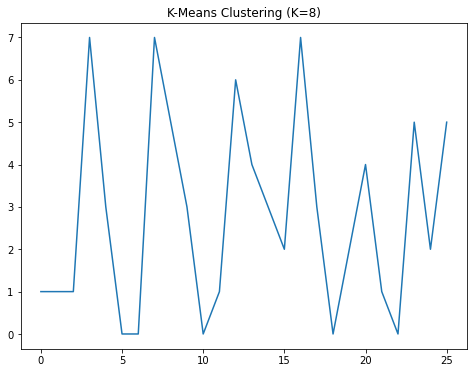

In [8]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#import spectral

# Reshape the data to 2D (number of pixels, number of bands)
#n_spec, n_bands = sli.nSpec, sli.nBands
#data_2d = data.reshape((-1,1))

# Specify the number of clusters (K)
n_clusters = 8

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
#kmeans.fit(data)
kmeans.fit(sli_data)

# Get the cluster labels for each pixel
cluster_labels = kmeans.labels_

# Reshape the cluster labels to the original image shape
#cluster_image = cluster_labels.reshape((data.shape[0], data.shape[1]))

# Visualize the clustered image
plt.figure(figsize=(8,6))
plt.plot(cluster_labels)
#plt.imshow(cluster_labels, cmap='jet')
#plt.colorbar()
plt.title(f'K-Means Clustering (K={n_clusters})')
plt.show()


(10, 720)


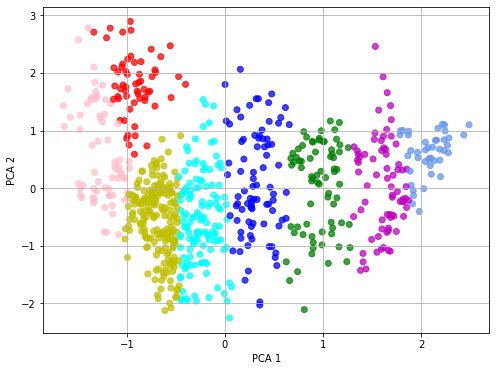

In [11]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True, n_components=10)
pca.fit(sli_data)
pca_spec = pca.transform(sli_data).T
print(pca_spec.shape)

colors=np.array(['r', 'g', 'b', 'y', 'm', 'cornflowerblue', 'cyan', 'pink', 'purple'])
#random_vals = np.array(data)[random_values.astype(int)]

plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
plt.scatter(pca_spec[0,:],pca_spec[1,:], alpha=0.75, c=colors[cluster_labels])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#plt.colorbar()
plt.grid(True)

In [26]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 7, 7, 3, 3, 3, 7, 7, 3, 7, 3, 3, 6, 7, 7, 3, 3,
       1, 2, 1, 3, 3, 7, 7, 3, 7, 7, 7, 7, 7, 6, 0, 7, 7, 3, 7, 3, 2, 7,
       7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 2, 0, 2, 1,
       1, 2, 2, 0, 0, 1, 4, 1, 3, 0, 0, 0, 7, 7, 0, 0, 7, 3, 5, 4, 1, 1,
       3, 3, 3, 3, 3, 4, 1, 4, 1, 4, 4, 3, 3, 3, 6, 6, 2, 1, 4, 4, 3, 6,
       6, 2, 3, 6, 2, 2, 6, 6, 3, 6, 1, 6, 6, 1, 6, 6, 6, 6, 6, 2, 6, 6,
       2, 2, 1, 1, 4, 4, 4, 5, 1, 4, 4, 1, 2, 1, 2, 4, 4, 2, 0, 0, 0, 0,
       2, 4, 0, 0, 0, 6, 2, 1, 1, 1, 4, 4, 2, 1, 4, 6, 2, 0, 2, 0, 2, 4,
       2, 0, 0, 0, 6, 0, 7, 1, 0, 0, 4, 1, 1, 2, 2, 0, 0, 0, 6, 0, 0, 0,
       7, 0, 6, 0, 1, 0, 0, 0, 0, 6, 0, 0, 0, 4, 5, 5, 2, 1, 0, 0, 7, 3,
       2, 1, 0, 2, 0, 0, 4, 0, 2, 4, 5, 2, 7, 7, 7, 0, 7, 7, 0, 0, 7, 7,
       0, 7, 0, 4, 0, 0, 7, 7, 6, 7, 7, 7, 0, 7, 0, 7, 7, 7, 7, 7, 7, 7,
       3, 2, 4, 6, 3, 3, 3, 1, 2, 6, 6, 2, 1, 6, 6, 6, 2, 5, 2, 3, 3, 3,
       2, 2, 2, 6, 2, 4, 6, 3, 6, 5, 1, 6, 3, 6, 3,

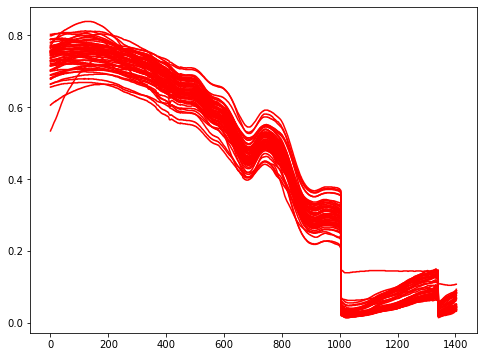

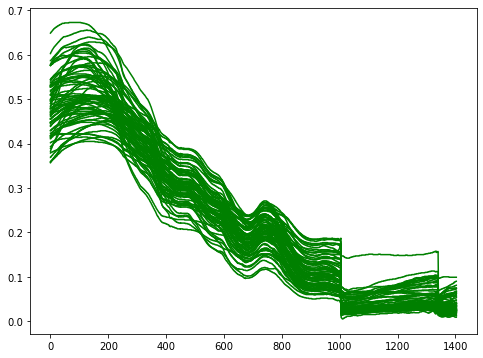

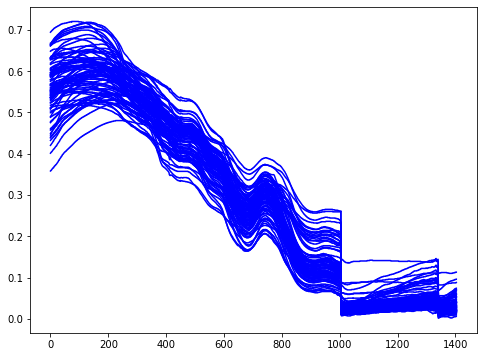

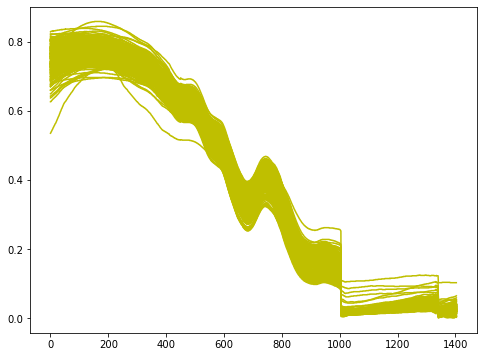

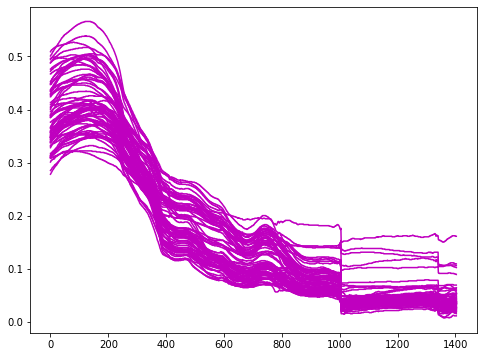

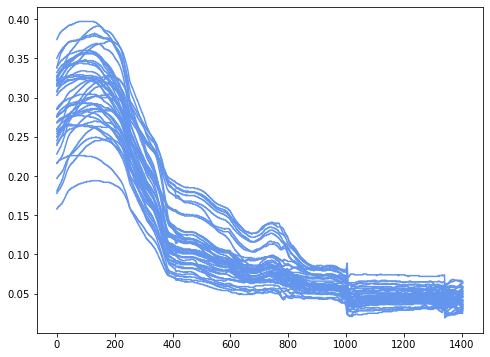

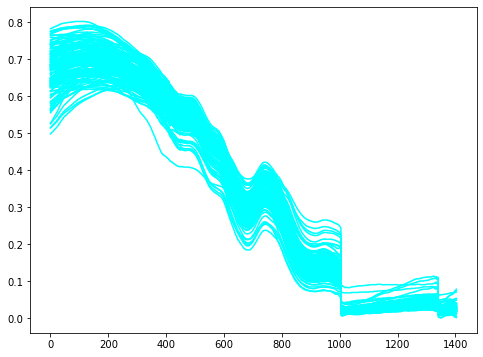

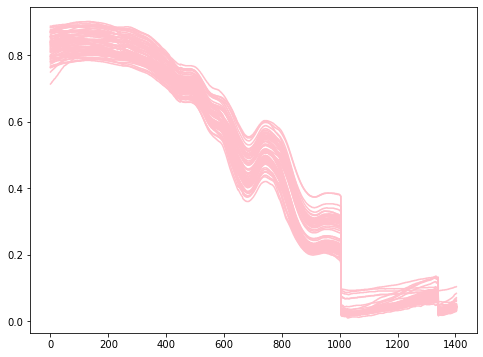

In [11]:
plt.rcParams["figure.figsize"] = (8,6)

for cl in np.unique(cluster_labels):
    plt.figure()
    idx = np.where(cluster_labels == cl)
    plt.plot(np.squeeze(sli_data[idx,:].T), c=colors[cl])

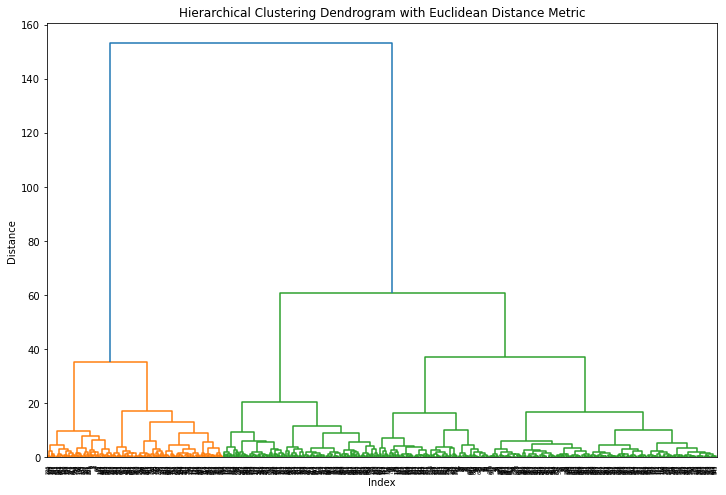

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (12,8)
    
def hierarchical_clustering():
    # Perform hierarchical clustering
    linkage_matrix = linkage(sli_data, method='ward', metric='euclidean')

    # Display the dendrogram
    dendrogram(linkage_matrix)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.title('Hierarchical Clustering Dendrogram with Euclidean Distance Metric')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()

hierarchical_clustering()


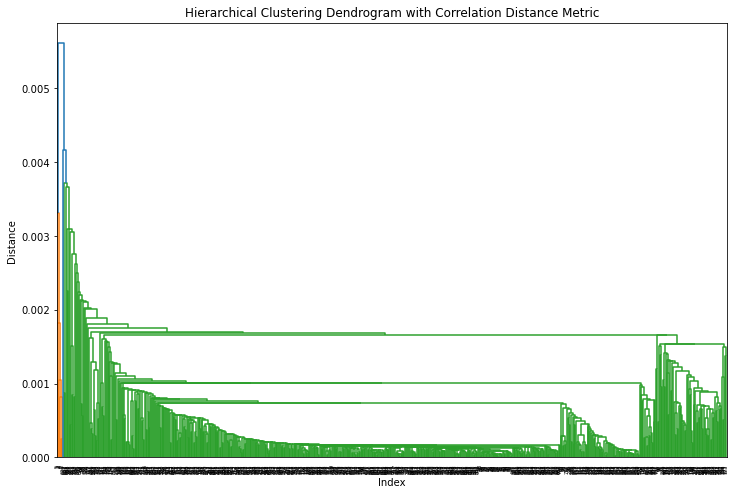

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

def hierarchical_clustering_corr():
    # Perform hierarchical clustering
    linkage_matrix = linkage(sli_data, method='single', metric='correlation')

    # Display the dendrogram
    dendrogram(linkage_matrix)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.title('Hierarchical Clustering Dendrogram with Correlation Distance Metric')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()

hierarchical_clustering_corr()


In [26]:
len(sli.names)

2712

In [22]:
wl3.shape

(1404,)

In [24]:
spectra_arr.shape

(720, 1404)

In [27]:
# save the collection as an ENVI spectral library
from spectral import envi

fname = 'test_library'
header = {}
header['spectra names'] = sli.names
header['wavelength'] = list(sli.wl)
spectra_arr = sli.spectra #(sli.nSpec,sli.nBands)
lib = envi.SpectralLibrary(spectra_arr, header, [])
lib.save(fname)

In [36]:
# save the collection as an ENVI spectral library
from spectral import envi

fname = 'test_library_clean'
header = {}
header['spectra names'] = sli_names
header['wavelength'] = list(wl3)
spectra_arr = sli_data #(sli.nSpec,sli.nBands)
lib = envi.SpectralLibrary(spectra_arr, header, [])
lib.save(fname)

In [42]:
lib = envi.open('test_library_clean.hdr')

In [44]:
lib.spectra

array([[0.483, 0.485, 0.487, ..., 0.066, 0.066, 0.066],
       [0.498, 0.5  , 0.502, ..., 0.08 , 0.081, 0.081],
       [0.491, 0.493, 0.496, ..., 0.064, 0.065, 0.065],
       ...,
       [0.606, 0.607, 0.607, ..., 0.084, 0.085, 0.085],
       [0.278, 0.279, 0.28 , ..., 0.161, 0.161, 0.161],
       [0.301, 0.302, 0.304, ..., 0.052, 0.052, 0.053]], dtype=float32)

In [65]:
# This code is from the sklearn documentation
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

import numpy as np
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

'''
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[     ############# REPLACE X WITH ICE DATA ##############
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]     
'''

X = sli_data

lowest_bic = np.infty
bic = []
n_components_range = range(4, 5)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

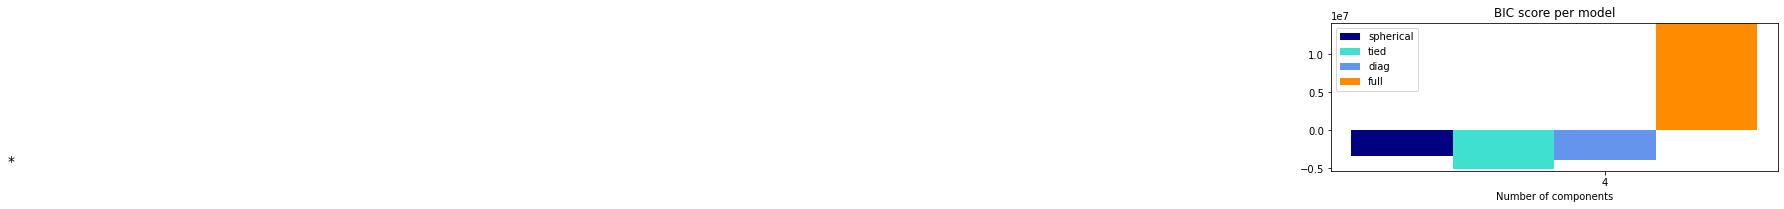

In [66]:
# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

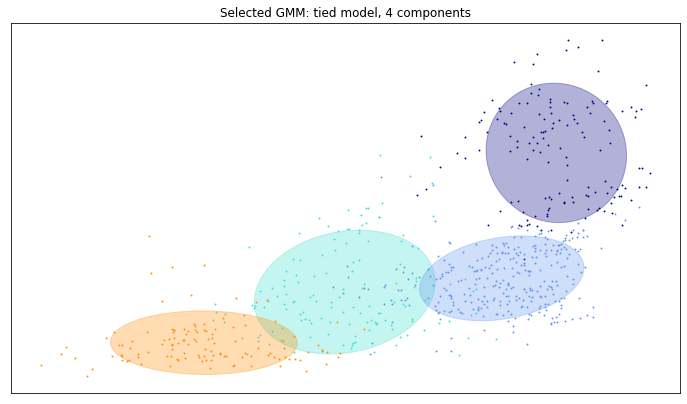

In [67]:
# Plot the winner
plt.figure(figsize=(12, 15))

splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    # Check if the matrix is square
    #if cov.shape[0] != cov.shape[1]:
    #    raise ValueError("Input matrix must be square")

    data_2d = X[:,[20,1000]]
    data_2d = data_2d[Y_ == i,:]
    data_2d_cov = np.cov(data_2d.T)
    v, w = linalg.eigh(data_2d_cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 20], X[Y_ == i, 1000], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(np.mean(data_2d,axis=0), v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.3)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
#plt.subplots_adjust(hspace=0.35, bottom=0.02)
#plt.show()
spl.legend([b[0] for b in bars], cv_types)

In [57]:
data_2d = X[:,[20,1000]]
data_2d_cov = np.cov(data_2d.T)
v, w = linalg.eigh(data_2d_cov)
print(v)

[0.00306021 0.02880723]


In [65]:
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    print(cov)
    print(cov.shape)
    print(clf.covariances_)


[9.02779432e-03 9.01597430e-03 9.00852164e-03 ... 9.29642691e-05
 9.73643018e-05 1.01773147e-04]
(1404,)
[[9.02779432e-03 9.01597430e-03 9.00852164e-03 ... 9.29642691e-05
  9.73643018e-05 1.01773147e-04]
 [9.01597430e-03 9.00645844e-03 8.99801482e-03 ... 9.36254690e-05
  9.80134074e-05 1.02417489e-04]
 [9.00852164e-03 8.99801482e-03 8.99188895e-03 ... 9.38219683e-05
  9.81862552e-05 1.02544262e-04]
 ...
 [9.29642691e-05 9.36254690e-05 9.38219683e-05 ... 3.21788369e-04
  3.21873955e-04 3.25025592e-04]
 [9.73643018e-05 9.80134074e-05 9.81862552e-05 ... 3.21873955e-04
  3.24203597e-04 3.26437604e-04]
 [1.01773147e-04 1.02417489e-04 1.02544262e-04 ... 3.25025592e-04
  3.26437604e-04 3.31158738e-04]]
[9.01597430e-03 9.00645844e-03 8.99801482e-03 ... 9.36254690e-05
 9.80134074e-05 1.02417489e-04]
(1404,)
[[9.02779432e-03 9.01597430e-03 9.00852164e-03 ... 9.29642691e-05
  9.73643018e-05 1.01773147e-04]
 [9.01597430e-03 9.00645844e-03 8.99801482e-03 ... 9.36254690e-05
  9.80134074e-05 1.024174

In [56]:
clf.covariances_.shape

(1404, 1404)

In [58]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

C:\Users\myang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\myang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "C:\Users\myang\anaconda3\lib\site-packages\sklearn\mixture\_base.py", line 198, in fit
    self.fit_predict(X, y)
  File "C:\Users\myang\anaconda3\lib\site-packages\sklearn\mixture\_base.py", line 251, in fit_predict
    self._initialize_parameters(X, random_state)
  File "C:\Users\myang\anaconda3\lib\site-pa

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x00000232B2DE3DC0>)

In [59]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
17,6,diag,-738156.056191
16,5,diag,-715638.565637
15,4,diag,-696602.072761
5,6,spherical,-682144.507320
4,5,spherical,-668614.152499


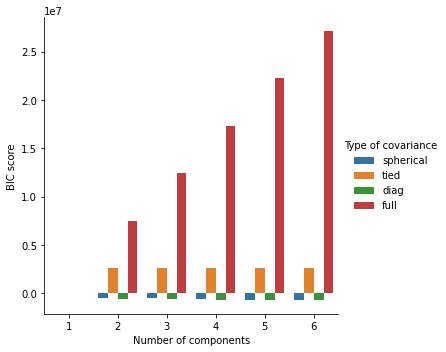

In [60]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [66]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def hierarchical_clustering(data, method='single', metric='euclidean', show_dendrogram=True):
    """
    Perform hierarchical clustering on the given data.

    Parameters:
    - data: 2D numpy array where each row represents a data point and each column is a feature.
    - method: Linkage algorithm to use (e.g., 'single', 'complete', 'average', 'ward', etc.).
    - metric: Distance metric to use (e.g., 'euclidean', 'manhattan', 'cosine', etc.).
    - show_dendrogram: Whether to display the dendrogram plot.

    Returns:
    - clusters: An array specifying the cluster assignments for each data point.
    """
    # Perform hierarchical clustering
    linkage_matrix = linkage(data, method=method, metric=metric)

    # Display the dendrogram if requested
    #if show_dendrogram:
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

    # Extract cluster assignments
    clusters = np.array([i for i in range(1, len(data) + 1)])

    return clusters

# Example usage:
# data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
# clusters = hierarchical_clustering(data, method='single', metric='euclidean')
# print(clusters)


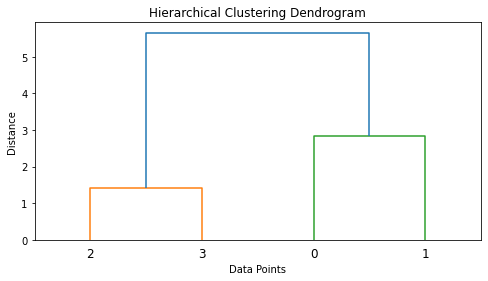

[1 2 3 4]


In [68]:
test_data = np.array([[1, 2], [3, 4], [8,9], [7, 8]])
test_clusters = hierarchical_clustering(test_data, method='single', metric='euclidean')
print(test_clusters)

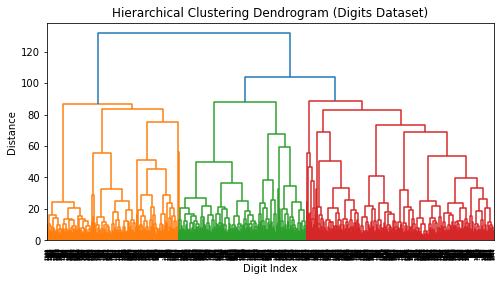

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

def hierarchical_clustering_digits():
    # Load the digits dataset
    digits = datasets.load_digits()
    data = digits.data

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Perform hierarchical clustering
    linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')

    # Display the dendrogram
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram (Digits Dataset)')
    plt.xlabel('Digit Index')
    plt.ylabel('Distance')
    plt.show()

# Example usage:
hierarchical_clustering_digits()


In [78]:
#digits = datasets.load_digits()
digits.data[1,:]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [38]:
print(data.shape) 

############ THIS IS 1404 WAVELENGTHS WITH 720 ALBEDOS (SPECTRA) #######################

pca = PCA(whiten=True, n_components=10)
pca.fit(data)
pca_spec = pca.transform(data)
print(pca_spec.shape)

(720, 1404)
(720, 10)


TypeError: Invalid shape (13,) for image data

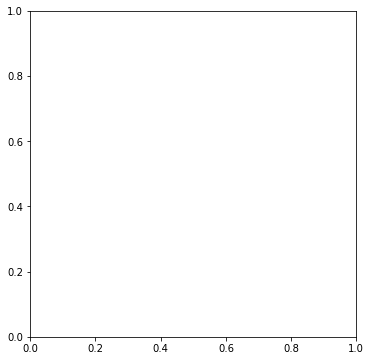

In [11]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#import spectral

# Reshape the data to 2D (number of pixels, number of bands)
n_spec, n_bands = sli.nSpec, sli.nBands
#data_2d = data.reshape((n_spec, n_bands))

# Specify the number of clusters (K)
n_clusters = 5

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data)
#kmeans.fit(data_2d)

# Get the cluster labels for each pixel
cluster_labels = kmeans.labels_

# Reshape the cluster labels to the original image shape
#cluster_image = cluster_labels.reshape((data.shape[0], data.shape[1]))

# Visualize the clustered image
plt.figure(figsize=(8,6))
plt.imshow(cluster_labels, cmap='jet')
plt.colorbar()
plt.title(f'K-Means Clustering (K={n_clusters})')
plt.show()


In [12]:
sli.nSpec

1008

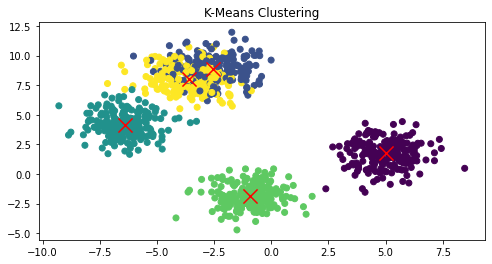

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate some sample data (you can replace this with your own data)
n_samples = 1008
n_features = 2151
n_clusters = 5
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

# Get cluster labels and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
plt.title('K-Means Clustering')
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import spectral

# Load the hyperspectral image
image = spectral.open_image('your_hyperspectral_image.hdr')  # Replace with your image file

# Extract the data as a 2D array
data = image.load()

# Reshape the data to 2D (number of pixels, number of bands)
n_pixels, n_bands = data.shape[0], data.shape[2]
data_2d = data.reshape((n_pixels, n_bands))

# Specify the number of clusters (K)
n_clusters = 5

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(data_2d)

# Get the cluster labels for each pixel
cluster_labels = kmeans.labels_

# Reshape the cluster labels to the original image shape
cluster_image = cluster_labels.reshape((data.shape[0], data.shape[1]))

# Visualize the clustered image
plt.figure(figsize=(10, 10))
plt.imshow(cluster_image, cmap='jet')
plt.colorbar()
plt.title(f'K-Means Clustering (K={n_clusters})')
plt.show()


In [1]:
# data from: https://arcticdata.io/catalog/view/doi%3A10.18739%2FA2FT8DK8Z
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import importlib.util
import glob
import os
import csv

#wl_4b = np.asarray([490, 565, 665, 865])
#wl_8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])

In [2]:

def find_row_with_wavelengths(csv_file_path):
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for index, row in enumerate(reader):
            if 'Wavelengths' in row:
                return index

class spectral_library:
  def __init__(self, wl):
    self.spectra = np.zeros((0))
    self.spectra8b = np.zeros((0))
    self.spectra4b = np.zeros((0))
    self.wl = wl
    self.wl8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])
    self.wl4b = np.asarray([490, 565, 665, 865])
    self.nBands = len(wl)
    self.nSpec = 0
    self.names = []
  def add(self, spec, name=''): 
    if len(self.spectra) == 0:
        self.spectra = spec
    else:
        self.spectra = np.row_stack((self.spectra, spec))
    self.names.append(name)
    self.nSpec = self.nSpec + 1
  def resample_planet8b(self):
    self.spectra8b = np.zeros((self.nSpec,8))
    band_ranges = [[431,451],[465,515],[513,549],[547,583],[600,620],[650,682],[697,713],[845,885]]
    for spec_idx in range(self.nSpec):
        for band_idx in range(8):
            low = band_ranges[band_idx][0]
            high = band_ranges[band_idx][1]
            val = 0
            count = 0
            idx_list = np.where((self.wl>low)*(self.wl<high))
            #print(idx_list)
            for i in idx_list[0]:
                #print(spec_idx)
                #print(i)
                #print(np.isfinite(self.spectra[spec_idx,i]))
                if np.isfinite(self.spectra[spec_idx,i]):
                    val = val + self.spectra[spec_idx,i]
                    count = count + 1
            if count>0:
                self.spectra8b[spec_idx,band_idx] = val/count
            else:
                self.spectra8b[spec_idx,band_idx] = np.NaN


In [3]:

def read_library(csv_files):
    idx = find_row_with_wavelengths(csv_files[0])
    df = pd.read_csv(csv_files[0], header=idx)
    wl = df.iloc[:, 0]
    sli = spectral_library(wl)
    
    # Iterate through each CSV file and perform the desired operations
    for csv_file in csv_files:
        if csv_file[-3:]=='csv':
            # read the spectra into a dataframe
            #idx = find_row_with_wavelengths(csv_file)
            df = pd.read_csv(csv_file, header=idx)
            # add to the spectral library
            for col_name in df.columns[1:]:
                sli.add(df[col_name], name=col_name)
    return sli
                

In [9]:
print(read_library(csv_files).names[1])

Albedo1


Albedo1


In [1]:
import pandas as pd
import importlib.util
import glob
import os
import csv

# Specify the path to the .py file
py_file_path = "read_library.py"

# Load the .py file as a module
module_name = "read_library"
spec = importlib.util.spec_from_file_location(module_name, py_file_path)
read_library = importlib.util.module_from_spec(spec)
spec.loader.exec_module(read_library)

current_directory = os.getcwd()
csv_files = glob.glob(os.path.join(current_directory,'data1',"*.csv"))

sli = read_library(csv_files)
print(sli.names[1])

TypeError: 'module' object is not callable

In [34]:
sli.names[1]

'Albedo1'

In [4]:
print(sli.names)

['Albedo0', 'Albedo1', 'Albedo2', 'Albedo3', 'Albedo4', 'Albedo5', 'Albedo6', 'Albedo7', 'Albedo8', 'Albedo9', 'Albedo10', 'Albedo11', 'Albedo12', 'Albedo13', 'Albedo14', 'Albedo15', 'Albedo16', 'Albedo17', 'Albedo18', 'Albedo19', 'Albedo20', 'Albedo21', 'Albedo0', 'Albedo1', 'Albedo2', 'Albedo3', 'Albedo4', 'Albedo5', 'Albedo6', 'Albedo7', 'Albedo8', 'Albedo9', 'Albedo10', 'Albedo11', 'Albedo12', 'Albedo13', 'Albedo0', 'Albedo1', 'Albedo2', 'Albedo3', 'Albedo4', 'Albedo5', 'Albedo6', 'Albedo7', 'Albedo8', 'Albedo9', 'Albedo10', 'Albedo11', 'Albedo12', 'Albedo13', 'Albedo14', 'Albedo15', 'Albedo16', 'Albedo17', 'Albedo18', 'Albedo19', 'Albedo20', 'Albedo21', 'Albedo22', 'Albedo23', 'Albedo24', 'Albedo25', 'Albedo26', 'Albedo27', 'Albedo28', 'Albedo29', 'Albedo30', 'Albedo31', 'Albedo32', 'Albedo33', 'Albedo34', 'Albedo35', 'Albedo36', 'Albedo37', 'Albedo38', 'Albedo39', 'Albedo40']


In [ ]:
#This code dynamically loads the Python module from the .py file and allows you to use its functions and classes within your Jupyter Notebook.
#Run the Jupyter Notebook, and it will import and use the functions defined in the my_library.py file.

# Specify the path to the .py file
py_file_path = "my_library.py"

# Load the .py file as a module
module_name = "my_library"
spec = importlib.util.spec_from_file_location(module_name, py_file_path)
my_library = importlib.util.module_from_spec(spec)
spec.loader.exec_module(my_library)

# Use the library function
greeting = my_library.say_hello("Alice")
print(greeting)


In [1]:
# data from: https://arcticdata.io/catalog/view/doi%3A10.18739%2FA2FT8DK8Z
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import importlib.util
import glob
import os
import csv

wl_4b = np.asarray([490, 565, 665, 865])
wl_8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])

In [2]:
def plot_spectra(df, title):
    plt.figure(figsize=(12,6))
    # get the wavelengths from the first column
    wl = df.iloc[:, 0]
    # Loop through the rest of the columns (y-values) and plot them
    for col_name in df.columns[1:]:
        y_values = df[col_name]
        plt.plot(wl, y_values, label=col_name)
    for wl_val in wl_4b:
        plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.25)
    for wl_val in wl_8b:
        plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.25)
    # Add labels and legend to the plot
    plt.xlabel("Reflectance")
    plt.ylabel("Wavelength (nm)")
    plt.grid(True)
    plt.title(title)
    #plt.legend()
    # Show the plot
    plt.show()

def find_row_with_wavelengths(csv_file_path):
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for index, row in enumerate(reader):
            if 'Wavelengths' in row:
                return index

class spectral_library:
  def __init__(self, wl):
    self.spectra = np.zeros((0))
    self.spectra8b = np.zeros((0))
    self.spectra4b = np.zeros((0))
    self.wl = wl
    self.wl8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])
    self.wl4b = np.asarray([490, 565, 665, 865])
    self.nBands = len(wl)
    self.nSpec = 0
    self.names = []
  def add(self, spec, name=''): 
    if len(self.spectra) == 0:
        self.spectra = spec
    else:
        self.spectra = np.row_stack((self.spectra, spec))
    self.names.append(name)
    self.nSpec = self.nSpec + 1
  def resample_planet8b(self):
    self.spectra8b = np.zeros((self.nSpec,8))
    band_ranges = [[431,451],[465,515],[513,549],[547,583],[600,620],[650,682],[697,713],[845,885]]
    for spec_idx in range(self.nSpec):
        for band_idx in range(8):
            low = band_ranges[band_idx][0]
            high = band_ranges[band_idx][1]
            val = 0
            count = 0
            idx_list = np.where((self.wl>low)*(self.wl<high))
            #print(idx_list)
            for i in idx_list[0]:
                #print(spec_idx)
                #print(i)
                #print(np.isfinite(self.spectra[spec_idx,i]))
                if np.isfinite(self.spectra[spec_idx,i]):
                    val = val + self.spectra[spec_idx,i]
                    count = count + 1
            if count>0:
                self.spectra8b[spec_idx,band_idx] = val/count
            else:
                self.spectra8b[spec_idx,band_idx] = np.NaN


In [3]:
current_directory = os.getcwd()
csv_files = glob.glob(os.path.join(current_directory,'data','SpectralAlbedoData', "*.csv"))

# get the wavelengths:
idx = find_row_with_wavelengths(csv_files[0])
df = pd.read_csv(csv_files[0], header=idx)
wl = df.iloc[:, 0]
sli = spectral_library(wl)

# Iterate through each CSV file and perform the desired operations
for csv_file in csv_files:
    if csv_file[-3:]=='csv':
        # read the spectra into a dataframe
        idx = find_row_with_wavelengths(csv_file)
        df = pd.read_csv(csv_file, header=idx)
        # add to the spectral library
        for col_name in df.columns[1:]:
            sli.add(df[col_name], name=col_name)
        #plot_spectra(df, csv_file[csv_file.rfind('\\'):])
print('Done!')

Done!


In [4]:
print(sli.nSpec)
print(sli.nBands)

2712
2151


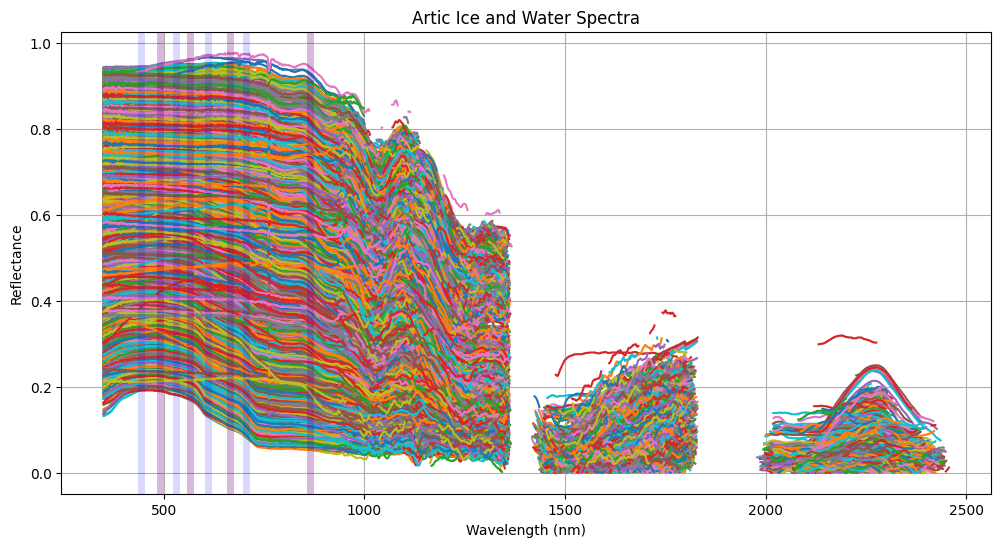

In [4]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra[idx,:]
    plt.plot(wl, y_values, label=sli.names[idx])
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra')
#plt.legend()
# Show the plot
plt.show()

In [9]:
sli.resample_planet8b()

In [15]:
print(sli.wl8b[1],sli.spectra8b[1])

490 [0.79836842 0.79197959 0.78611429 0.78194286 0.78015789 0.76412903
 0.7546     0.70697436]


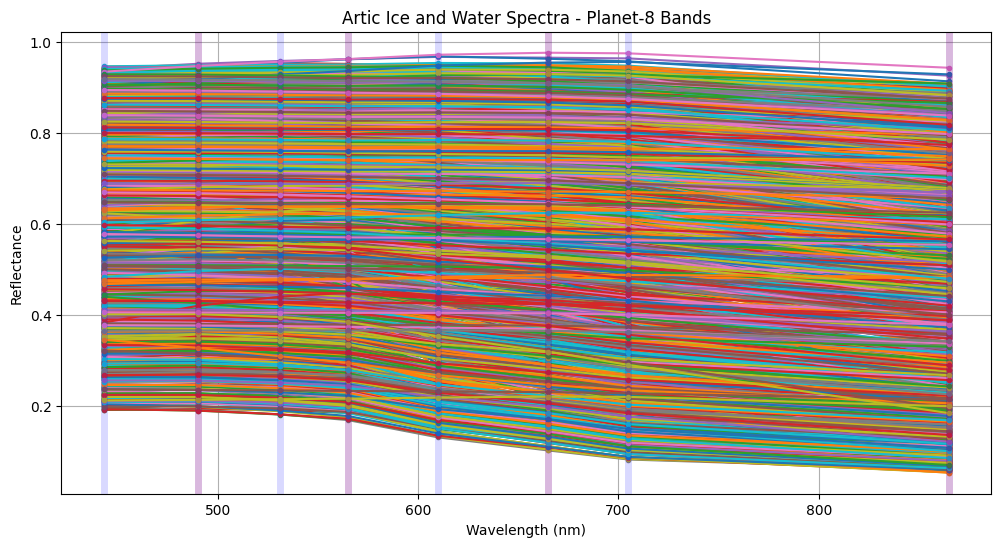

In [6]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values, label=sli.names[idx], marker='.')
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands')
#plt.legend()
# Show the plot
plt.show()

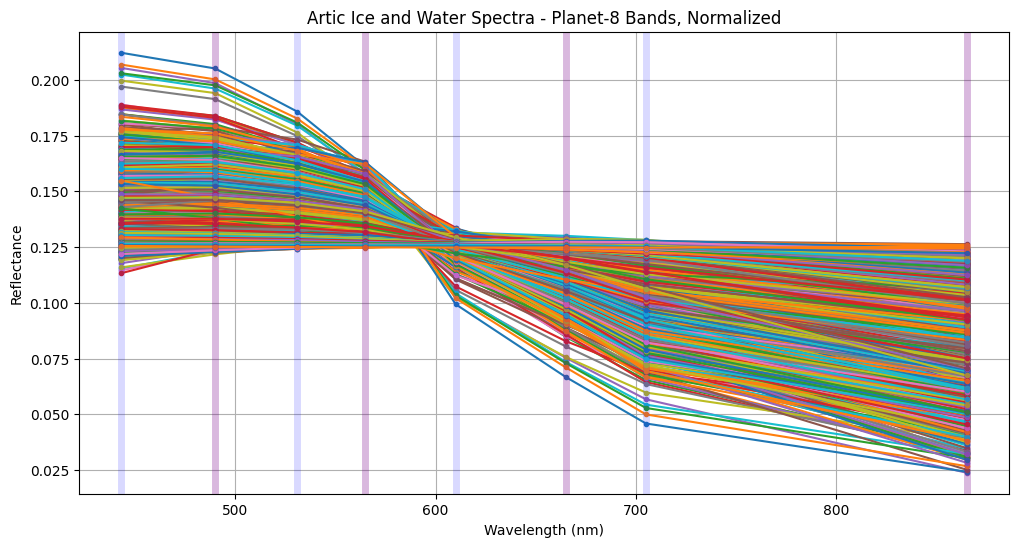

In [7]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values/np.sum(y_values), label=sli.names[idx], marker='.')
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands, Normalized')
#plt.legend()
# Show the plot
plt.show()

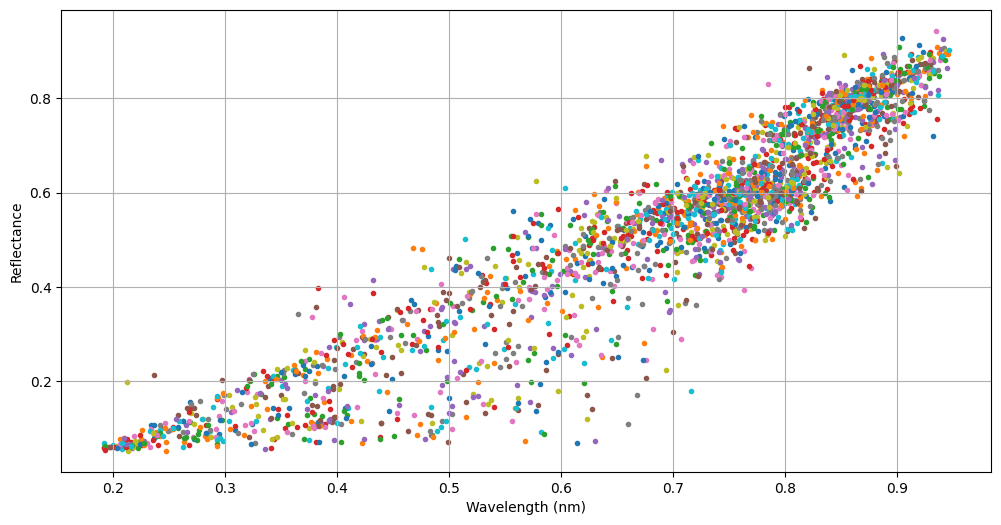

In [8]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.scatter(y_values[0],y_values[7], label=sli.names[idx], marker='.')
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
#plt.legend()
# Show the plot
plt.show()

In [9]:
data = sli.spectra8b[~np.isnan(sli.spectra8b),:]
pca = PCA()
pca.fit(data)
pca_spec = pca.transform(data)
plt.scatter(pca_spec[0,:],pca_spec[1,:], marker='.')

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed